In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load datasets
zomato_data = pd.read_csv("https://github.com/dsrscientist/dataset4/raw/main/zomato.csv", encoding='ISO-8859-1')
country_code = pd.read_excel("https://github.com/dsrscientist/dataset4/raw/main/Country-Code.xlsx")

# Merge datasets
data = pd.merge(zomato_data, country_code, on='Country Code')

In [4]:
data.shape

(9551, 22)

In [5]:
data.head(12)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,No,No,No,No,3,4.4,Green,Very Good,336,Phillipines
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Yes,No,No,No,4,4.0,Green,Very Good,520,Phillipines
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Yes,No,No,No,4,4.2,Green,Very Good,677,Phillipines
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Yes,No,No,No,4,4.9,Dark Green,Excellent,621,Phillipines
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,532,Phillipines


In [6]:
data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [9]:
# Display summary statistics of numerical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [15]:
# Load the country code dataset
country_code = pd.read_excel("https://github.com/dsrscientist/dataset4/raw/main/Country-Code.xlsx")

# Display country codes with corresponding country names
print(country_code[['Country Code', 'Country']])

    Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States


In [16]:
# Explore and preprocess data
# For simplicity, we'll focus only on numerical features for prediction
data = data[['Votes', 'Aggregate rating', 'Average Cost for two', 'Price range']]

# Handle missing values
data.dropna(inplace=True)

# Select features and target variables
X = data[['Votes', 'Aggregate rating']]
y_cost = data['Average Cost for two']
y_range = data['Price range']

# Split the data into training and testing sets
X_train, X_test, y_cost_train, y_cost_test = train_test_split(X, y_cost, test_size=0.2, random_state=42)
_, _, y_range_train, y_range_test = train_test_split(X, y_range, test_size=0.2, random_state=42)

# Train machine learning models
# For simplicity, we'll use Linear Regression for both predictions
model_cost = LinearRegression()
model_cost.fit(X_train, y_cost_train)

model_range = LinearRegression()
model_range.fit(X_train, y_range_train)

# Make predictions on new data
# For simplicity, we'll use the same test set for both predictions
cost_predictions = model_cost.predict(X_test)
range_predictions = model_range.predict(X_test)

# Print example predictions
print("Example Cost Prediction:", cost_predictions[0])
print("Example Range Prediction:", range_predictions[0])

Example Cost Prediction: 790.0026063865001
Example Range Prediction: 1.642003537302644


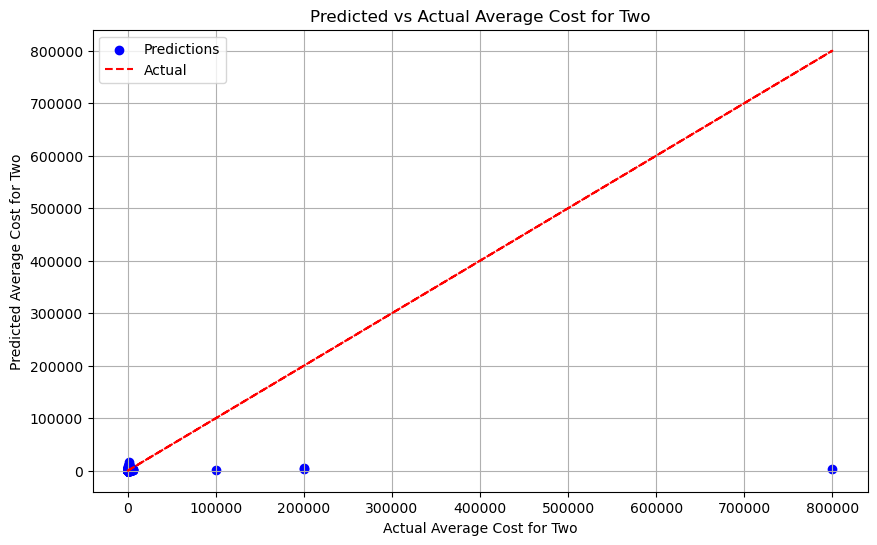

In [18]:
import matplotlib.pyplot as plt

# Create scatter plot for Average Cost for two
plt.figure(figsize=(10, 6))
plt.scatter(y_cost_test, cost_predictions, color='blue', label='Predictions')
plt.plot(y_cost_test, y_cost_test, color='red', label='Actual', linestyle='--')
plt.title('Predicted vs Actual Average Cost for Two')
plt.xlabel('Actual Average Cost for Two')
plt.ylabel('Predicted Average Cost for Two')
plt.legend()
plt.grid(True)
plt.show()

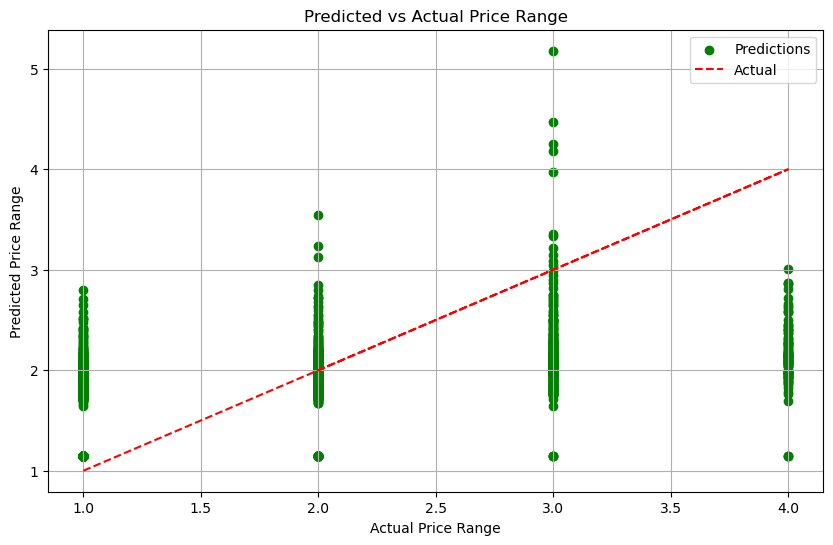

In [19]:
# Create scatter plot for Price range
plt.figure(figsize=(10, 6))
plt.scatter(y_range_test, range_predictions, color='green', label='Predictions')
plt.plot(y_range_test, y_range_test, color='red', label='Actual', linestyle='--')
plt.title('Predicted vs Actual Price Range')
plt.xlabel('Actual Price Range')
plt.ylabel('Predicted Price Range')
plt.legend()
plt.grid(True)
plt.show()